## Linear Regression Project: house_price_regression

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import getpass  
password = getpass.getpass()

········


In [2]:
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import load_iris 
from sklearn import datasets, linear_model, metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score



### MySQL Requirements:

1. Create a database called house_price_regression.
2. Create a table house_price_data with the same columns as given in the csv file. Please make sure you use the correct data types for the columns.
3. Import the data from the csv file into the table. Before you import the data into the empty table, make sure that you have deleted the headers from the csv file. To not modify the original data, if you want you can create a copy of the csv file as well. Note you might have to use the following queries to give permission to SQL to import data from csv files in bulk:
SHOW VARIABLES LIKE 'local_infile'; -- This query would show you the status of the variable ‘local_infile’. If it is off, use the next command, otherwise you should be good to go

SET GLOBAL local_infile = 1;

4. Select all the data from table house_price_data to check if the data was imported correctly

![alt text](Image1.png "Screenshot")

###### As seen from the screenshot above, all the previous steps were completed succesfully. 

5. Use the alter table command to drop the column date from the database, as we would not use it in the analysis with SQL. Select all the data from the table to verify if the command worked. Limit your returned results to 10. 

Query:
    
    ALTER TABLE house_price_data
    DROP COLUMN date;
    
    SELECT *
    FROM house_price_data
    LIMIT 10;
    
    

![alt text](Image2.png "Screenshot")

###### Column 'date' was deleted

6. Use sql query to find how many rows of data you have. 

Query:
    
    SELECT COUNT(*) 
    FROM house_price_data;

Result: 21597

### Continuing project outside of MySQL Workbench:

In [3]:
#creating connection to view results on notebook
connection_string = 'mysql+pymysql://root:' + password + '@localhost/house_price_regression'
engine = create_engine(connection_string)
data = pd.read_sql_query('SELECT * FROM house_price_regression.house_price_data', engine)

In [4]:
data

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


10. In this exercise we will use simple group by to check the properties of some of the categorical variables in our data
    


 * What is the average sqft_living of the houses grouped by bedrooms? The returned result should have only two columns, bedrooms and Average of the sqft_living. Use an alias to change the name of the second column.

In [5]:
query = """SELECT AVG(sqft_living) AS avg_sqft,d.bedrooms
FROM house_price_regression.house_price_data d 
GROUP BY bedrooms
ORDER BY bedrooms DESC;"""
pd.read_sql_query(query, engine)

,avg_sqft,bedrooms
0,1620.0000,33
1,3000.0000,11
2,3706.6667,10
3,3775.0000,9
4,3800.0000,8
5,3974.2105,7
6,3284.3419,6
7,3047.5453,5
8,2554.6497,4
9,1805.8372,3


* What is the average price of the houses with a waterfront and without a waterfront? The returned result should have only two columns, waterfront and Average of the prices. Use an alias to change the name of the second column.

In [6]:
query = """SELECT AVG(price) AS avg_price,
waterfront
FROM house_price_data
GROUP BY waterfront
ORDER BY avg_price DESC;"""
pd.read_sql_query(query, engine)

,avg_price,waterfront
0,1.662524e+06,1
1,5.317623e+05,0


* Is there any correlation between the columns condition and grade? You can analyse this by grouping the data by one of the variables and then aggregating the results of the other column. Visually check if there is a positive correlation or negative correlation or no correlation between the variables.


In [7]:
data

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
#checking for correlation
data['condition'].corr(data['grade'])

-0.14689580091008858

In [10]:
query1 = """SELECT AVG(d.condition) AS AVG_condition,
d.grade
FROM house_price_data d
GROUP BY grade
ORDER BY grade DESC;"""
corr_data = pd.read_sql_query(query1, engine)

In [11]:
corr_data

,AVG_condition,grade
0,3.1538,13
1,3.2135,12
2,3.1955,11
3,3.2328,10
4,3.2662,9
5,3.3556,8
6,3.4914,7
7,3.5397,6
8,3.4917,5
9,3.1481,4


In [12]:
query2 = """SELECT SUM(d.condition) AS sum_condition,
d.grade
FROM house_price_data d
GROUP BY grade
ORDER BY grade DESC;"""
corr_data2 = pd.read_sql_query(query2, engine)

In [13]:
corr_data2

,sum_condition,grade
0,41.0,13
1,286.0,12
2,1275.0,11
3,3666.0,10
4,8541.0,9
5,20352.0,8
6,31332.0,7
7,7214.0,6
8,845.0,5
9,85.0,4


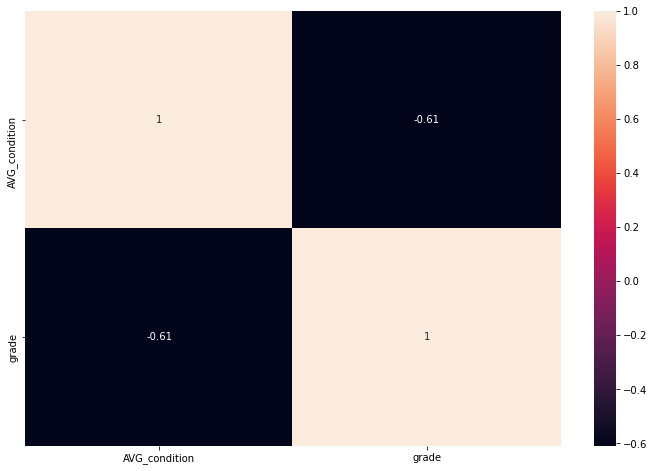

In [14]:
# Cheking for correlation visually with AVG(condition): 
corr_con_grd= corr_data.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_con_grd, annot=True)
plt.show()

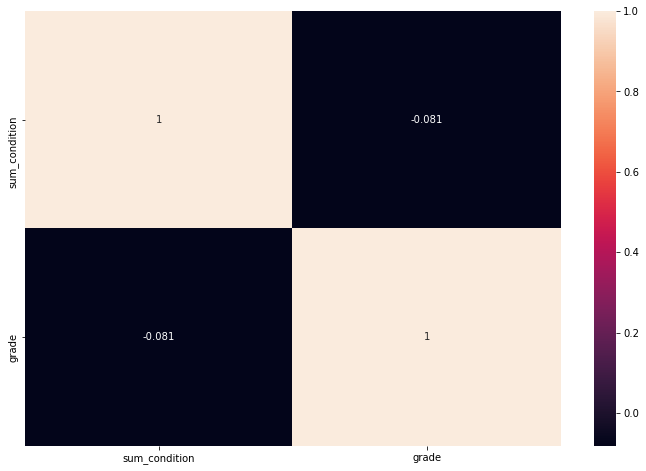

In [15]:
# Cheking for correlation visually with SUM(condition): 
corr_con_grd1= corr_data2.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_con_grd1, annot=True)
plt.show()

#### From both methods, visually and with .corr(), the result is a negative correlation

11. One of the customers is only interested in the following houses:
    * Number of bedrooms either 3 or 4
    * Bathrooms more than 3
    * One Floor
    * No waterfront
    * Condition should be 3 at least
    * Grade should be 5 at least
    * Price less than 300000


12. For the rest of the things, they are not too concerned. Write a simple query to find what are the options available for them?

In [16]:
query = """SELECT *
FROM house_price_data d
WHERE d.bedrooms = 3 OR 4
AND d.bathrooms > 3
AND d.floors = 1
AND d.waterfront = 0
AND d.condition >= 3
AND d.grade >= 5
AND d.price < 300000;"""
answer_11= pd.read_sql_query(query, engine)
answer_11

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,1954400510,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
3,1321400060,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
4,2008000270,3,1.50,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,7852140040,3,2.50,2270,5536,2,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731,507250
9823,9834201367,3,2.00,1490,1126,3,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,429000
9824,2997800021,3,2.50,1310,1294,2,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,475000
9825,263000018,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000


In [17]:
#Understanding values in bedrooms column:
answer_11['bedrooms'].value_counts()

3    9824
5       2
6       1
Name: bedrooms, dtype: int64

13. Your manager wants to find out the list of properties whose prices are twice more than the average of all the properties in the database. Write a query to show them the list of such properties. You might need to use a sub query for this problem.

In [18]:
query = """SELECT d.id, d.price, 
(SELECT AVG(price) FROM house_price_data e) AS average_price
FROM house_price_data d
WHERE d.price > 1080593.1470
ORDER BY d.price DESC;"""
pd.read_sql_query(query, engine)

,id,price,average_price
0,6762700020,7700000,540296.5735
1,9808700762,7060000,540296.5735
2,9208900037,6890000,540296.5735
3,2470100110,5570000,540296.5735
4,8907500070,5350000,540296.5735
...,...,...,...
1241,1326059182,1090000,540296.5735
1242,7796000095,1090000,540296.5735
1243,4147200040,1090000,540296.5735
1244,1121000357,1090000,540296.5735


14. Since this is something that the senior management is regularly interested in, create a view of the same query.

Query used:  
    
    """USE house_price_regression;
    CREATE VIEW houses_above_average AS
    SELECT d.id, d.price, (SELECT AVG(price) FROM house_price_data e) AS average_price,
    (SELECT (AVG(price)*2) FROM house_price_data e) AS double_average_price
    FROM house_price_data d
    WHERE d.price > 1080593.1470
    ORDER BY d.price DESC;"""

#### Results: now there's 'houses_above_average' under 'Views'

![alt text](Image3.png "Screenshot")

15. Most customers are interested in properties with three or four bedrooms. What is the difference in average prices of the properties with three and four bedrooms?

In [19]:
query = """SELECT  AVG(d.price) AS avg_4,
(SELECT AVG(e.price) FROM house_price_data e WHERE bedrooms = 3) AS avg_3
FROM house_price_data d
WHERE bedrooms = 4;"""
pd.read_sql_query(query, engine)

,avg_4,avg_3
0,635564.6771,466276.5909


16. What are the different locations where properties are available in your database? (distinct zip codes)

In [20]:
query = """SELECT  DISTINCT(zipcode)
FROM house_price_data;"""
pd.read_sql_query(query, engine)

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
...,...
65,98072
66,98188
67,98014
68,98055


17. Show the list of all the properties that were renovated.

In [21]:
#First approach
query = """SELECT d.id AS Renovated_Properties, 
sqft_lot, sqft_lot15
FROM house_price_data d
WHERE sqft_lot != sqft_lot15;"""
pd.read_sql_query(query, engine)

,Renovated_Properties,sqft_lot,sqft_lot15
0,6414100192,7242,7639
1,5631500400,10000,8062
2,1954400510,8080,7503
3,2414600126,7470,8113
4,3793500160,6560,7570
...,...,...,...
17118,263000018,1131,1509
17119,6600060120,5813,7200
17120,1523300141,1350,2007
17121,291310100,2388,1287


In [22]:
#Second Approach: this approach draws less rows than the first approach, perhaps, the data hasn't been updated
query = """SELECT d.id AS Renovated_Properties,
yr_renovated
FROM house_price_data d
WHERE yr_renovated != 0;"""
pd.read_sql_query(query, engine)

,Renovated_Properties,yr_renovated
0,6414100192,1991
1,9547205180,2002
2,1483300570,1991
3,2450000295,2010
4,3626039325,1999
...,...,...
909,7351200295,1960
910,126039256,2006
911,4305600360,2009
912,3319500628,2014


18. Provide the details of the property that is the 11th most expensive property in your database.

In [23]:
#The table starts with 0 in thisncase #10 is the 11th most expensive property in the database
query = """SELECT *
FROM house_price_data d
ORDER BY d.price DESC
LIMIT 11;"""
pd.read_sql_query(query, engine)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,6762700020,6,8.00,12050,27600,3,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
1,9808700762,5,4.50,10040,37325,2,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7060000
2,9208900037,6,7.75,9890,31374,2,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
3,2470100110,5,5.75,9200,35069,2,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,5570000
4,8907500070,5,5.00,8000,23985,2,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,5350000
5,7558700030,6,6.00,7390,24829,2,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619,5300000
6,1247600105,5,5.25,8010,45517,2,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,5110000
7,1924059029,5,6.75,9640,13068,1,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,4670000
8,7738500731,5,5.50,6640,40014,2,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,4500000
9,3835500195,4,3.00,6430,27517,2,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592,4490000


## Understanding Data

In [24]:
data

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [25]:
data.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [26]:
data.shape

(21597, 20)

In [27]:
data.mean()

id               4.580474e+09
bedrooms         3.373200e+00
bathrooms        2.115826e+00
sqft_living      2.080322e+03
sqft_lot         1.509941e+04
floors           1.542205e+00
waterfront       7.547345e-03
view             2.342918e-01
condition        3.409825e+00
grade            7.657915e+00
sqft_above       1.788597e+03
sqft_basement    2.917250e+02
yr_built         1.971000e+03
yr_renovated     8.446479e+01
zipcode          9.807795e+04
lat              4.756009e+01
long            -1.222140e+02
sqft_living15    1.986620e+03
sqft_lot15       1.275828e+04
price            5.402966e+05
dtype: float64

In [28]:
#Checking descriptive statistics of data
data.describe

<bound method NDFrame.describe of                id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3       1.00         1180      5650       1   
1      6414100192         3       2.25         2570      7242       2   
2      5631500400         2       1.00          770     10000       1   
3      2487200875         4       3.00         1960      5000       1   
4      1954400510         3       2.00         1680      8080       1   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3       2.50         1530      1131       3   
21593  6600060120         4       2.50         2310      5813       2   
21594  1523300141         2       0.75         1020      1350       2   
21595   291310100         3       2.50         1600      2388       2   
21596  1523300157         2       0.75         1020      1076       2   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0

In [29]:
#The only types of data present in our data frame are: floats and integers
data.dtypes

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [30]:
#It's expected latitude and longitute data to be of float type, bathroom data makes no sense when it's 2.25
#checking values in bathrooms column
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [31]:
#As expected from .dtypes, all columns have numeric data
data._get_numeric_data().columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [32]:
#Checking for Null values, data doesn't contain Null values
data.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

### Explaratory Data Analysis

#### Looking for outliers

 Checking relations between marginal distribution and joint distribution including 'price' column in all plots.

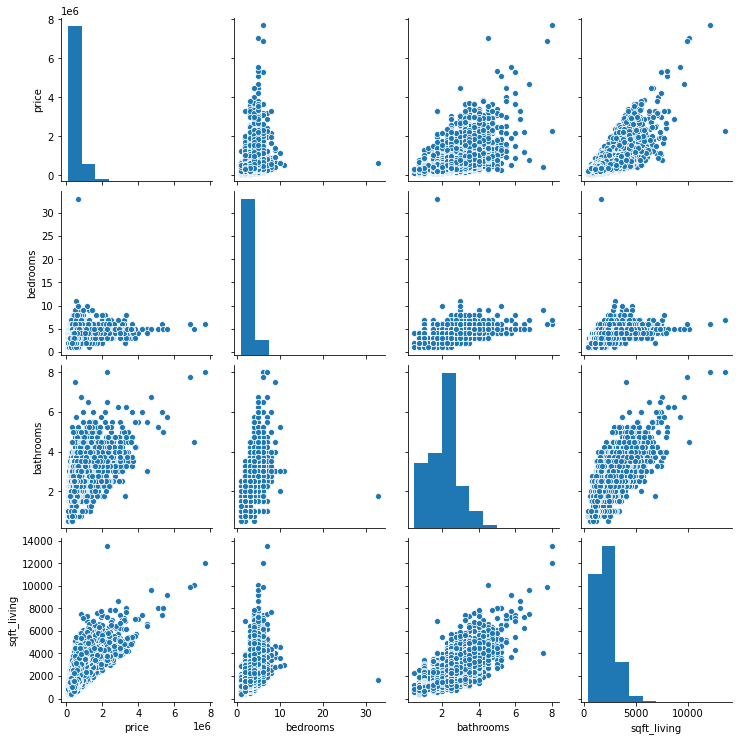

In [33]:
#The 'id' column has not been included since it's expectable that the number assigned to organize the data
#has little effect to the price of the house in the real estate market
data_pairplot1 = sns.pairplot(data, vars=['price','bedrooms','bathrooms', 'sqft_living'])

In [34]:
#Just by looking at the data above it's noticeable a strong correlation between 
#'price' and 'sqft_living' + 'bathrooms', probably also between 'bedroom' but it seems to be the column has outliers

In [35]:
#Checking for values in 'bedrooms' column, as it shows on the matrix, there's an outlier which is the value '33'
data['bedrooms'].value_counts()


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

From: https://www.researchgate.net/post/When_is_it_justifiable_to_exclude_outlier_data_points_from_statistical_analyses


    "If it can be determined that an outlying point is in fact erroneous, then the outlying value should be deleted from the analysis (or corrected if possible).
    
    In some cases, it may not be possible to determine if an outlying point is bad data. Outliers may be due to random variation or may indicate something scientifically interesting. In any event, we should not  simply delete the outlying observation before a through investigation. In  running experimdnts , we may repeat the experiment. If the data contains significant outliers, we may need to consider the use of robust statistical techniques."

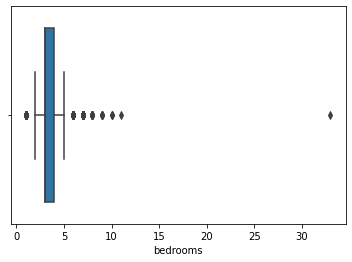

In [36]:
ax = sns.boxplot(x=data["bedrooms"])

## DROP

In [37]:
#Understanding outlier, seems to be a data entry error since it's not probable 
#a property of 33 rooms and 6,000ft2 lot has only 1.75 bahtrooms and a price of $640,000
data.loc[data['bedrooms']== 33]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,33,1.75,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [38]:
#Comparing outlier with most expensive property on dataset with a price of $7,700,000
data.loc[data['id']== 6762700020]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,6,8.0,12050,27600,3,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000


In [39]:
#Checking for values in 'bathrooms' column'
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

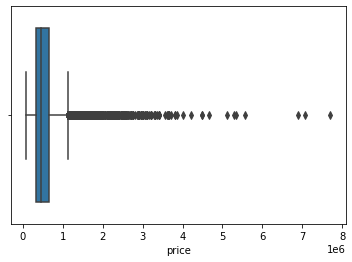

In [40]:
ax = sns.boxplot(x=data["price"])

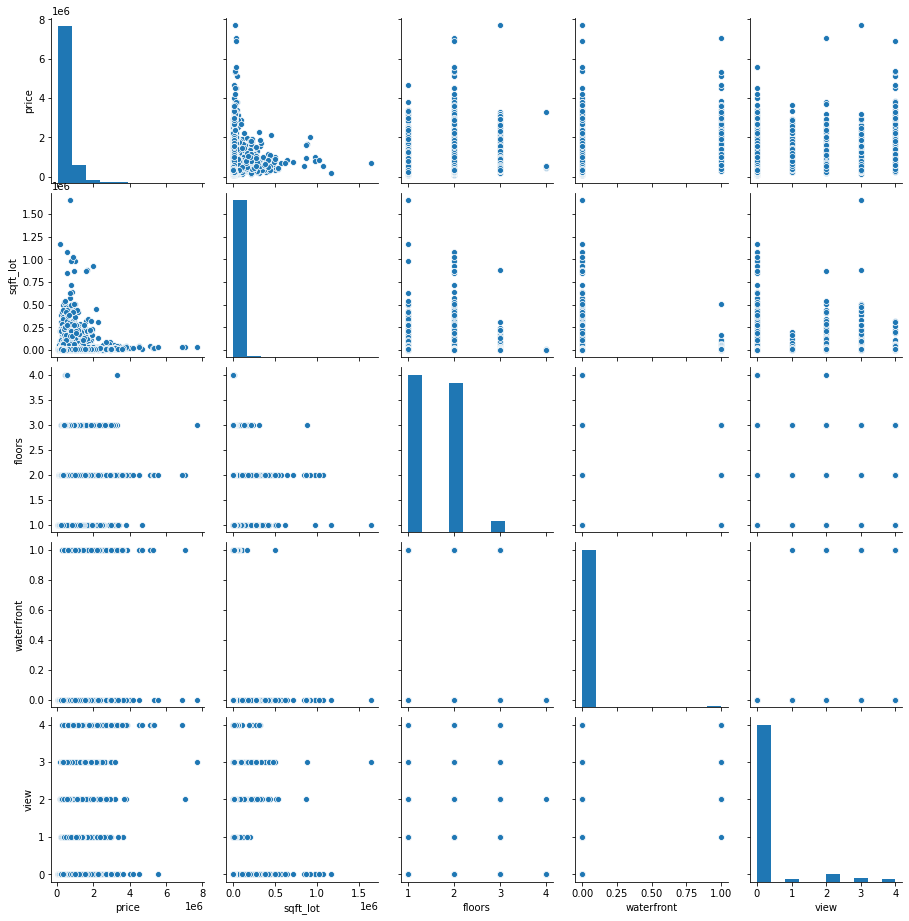

In [41]:
data_pairplot2 = sns.pairplot(data, vars=['price','sqft_lot','floors','waterfront', 'view'])

In [42]:
#From the matrix above, it can be concluded that 'view' column has only 4 values
#that 'waterfront' is a BOOLEAN 0,1 column (False : 0, True: 1) and 'floors' has also a limtied amount of values

In [43]:
data['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [44]:
#The column is a Boolean column:
data['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [45]:
# 99.2% of the values of this column are False
data['waterfront'].value_counts(normalize=True) * 100

0    99.245266
1     0.754734
Name: waterfront, dtype: float64

In [46]:
data['floors'].value_counts()

1    10673
2    10145
3      772
4        7
Name: floors, dtype: int64

In [47]:
data['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

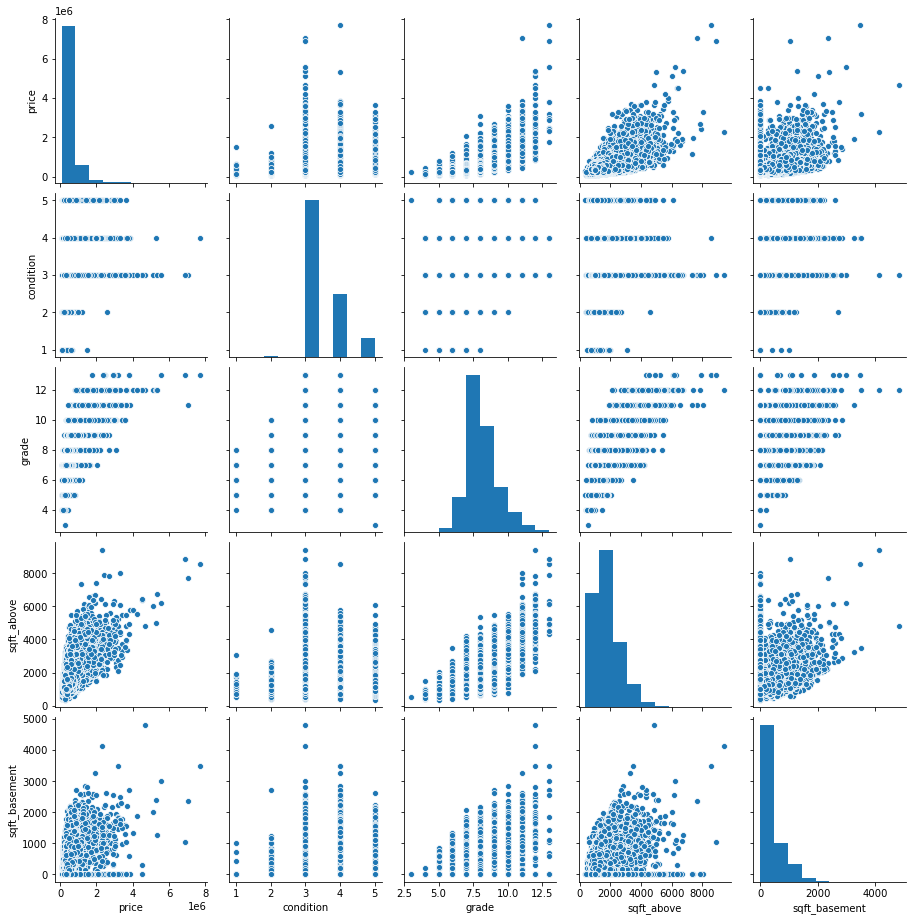

In [48]:
data_pairplot3 = sns.pairplot(data, vars=['price','condition','grade','sqft_above', 'sqft_basement'])

In [49]:
#Checking values of 'condition'
data['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [50]:
#Checking values of 'grade'
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

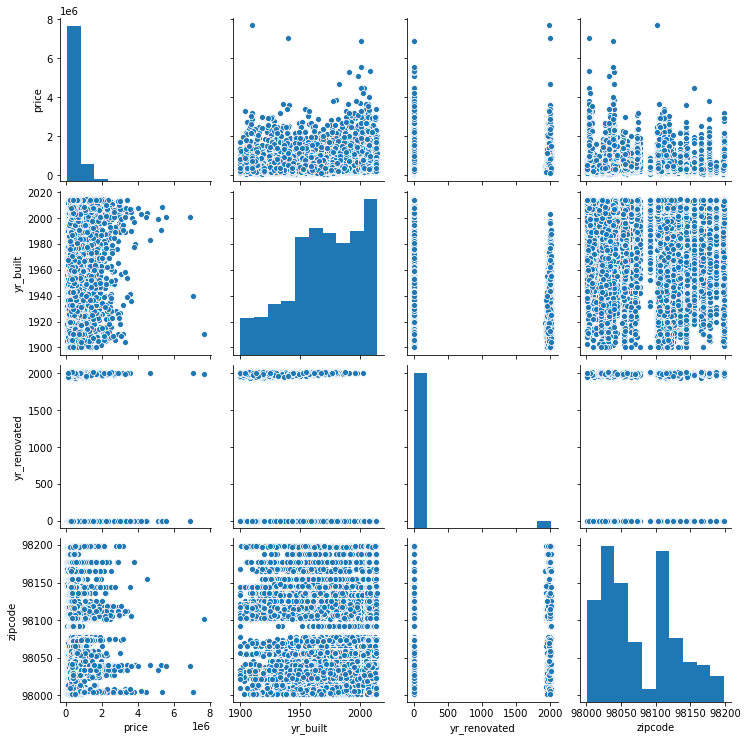

In [51]:
data_pairplot4 = sns.pairplot(data, vars=['price','yr_built','yr_renovated', 'zipcode'])

In [52]:
data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

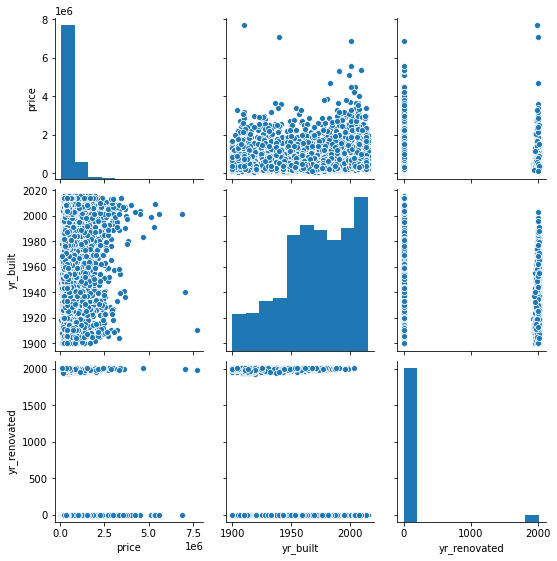

In [53]:
#Removing 'zipcode' as a column since it's a value that probably won't help our model predict the 'price'
#of a house according to feautres of the house
data_pairplot4_1 = sns.pairplot(data, vars=['price','yr_built','yr_renovated'])

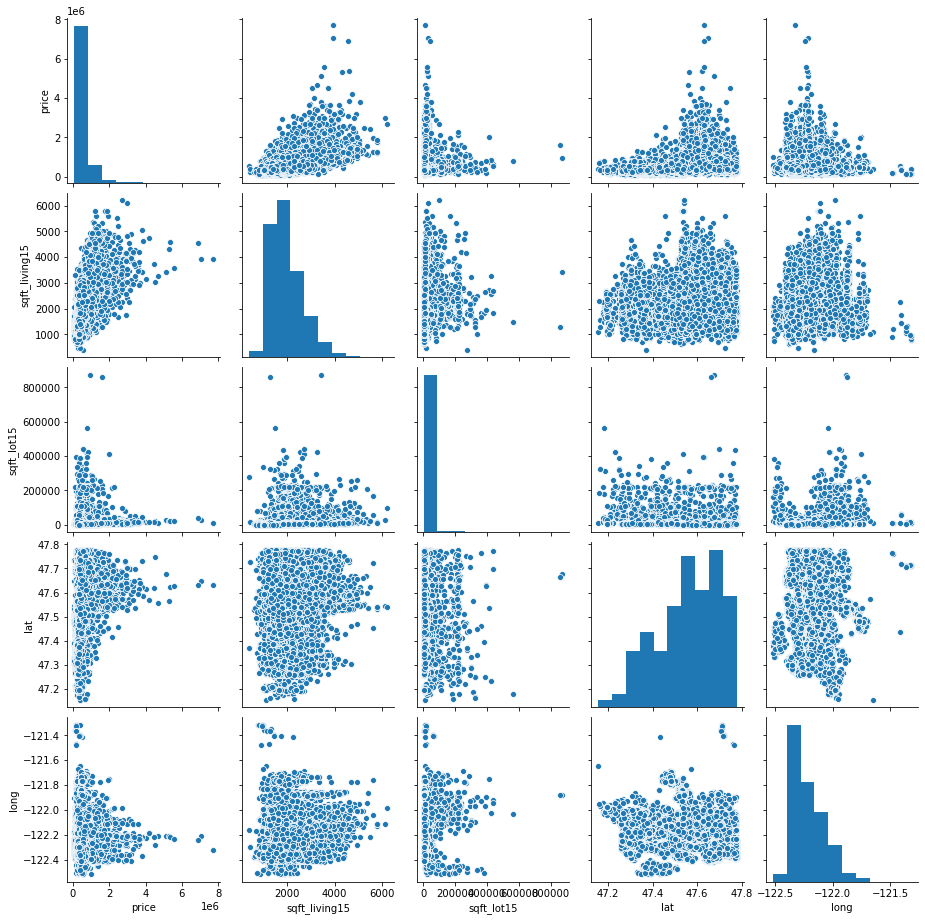

In [54]:
data_pairplot5 = sns.pairplot(data, vars=['price', 'sqft_living15', 'sqft_lot15', 'lat', 'long'])

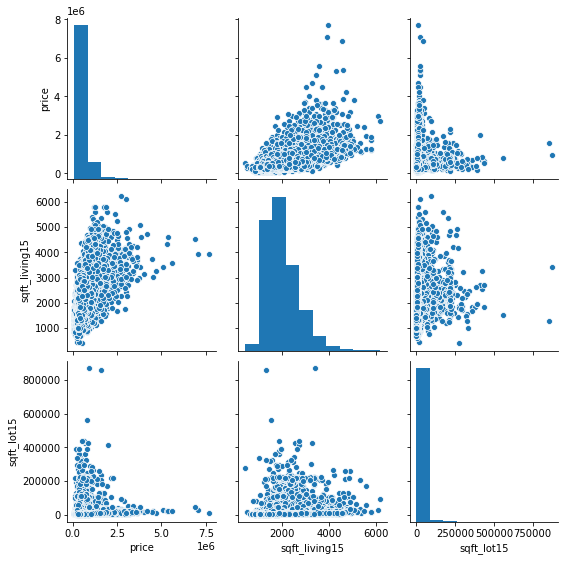

In [55]:
#Removing columns 'lat' 'long' since their  values probably won't help our model predict the 'price'
#of a house according to feautres of the house
data_pairplot5_1 = sns.pairplot(data, vars=['price', 'sqft_living15', 'sqft_lot15'])

<AxesSubplot:>

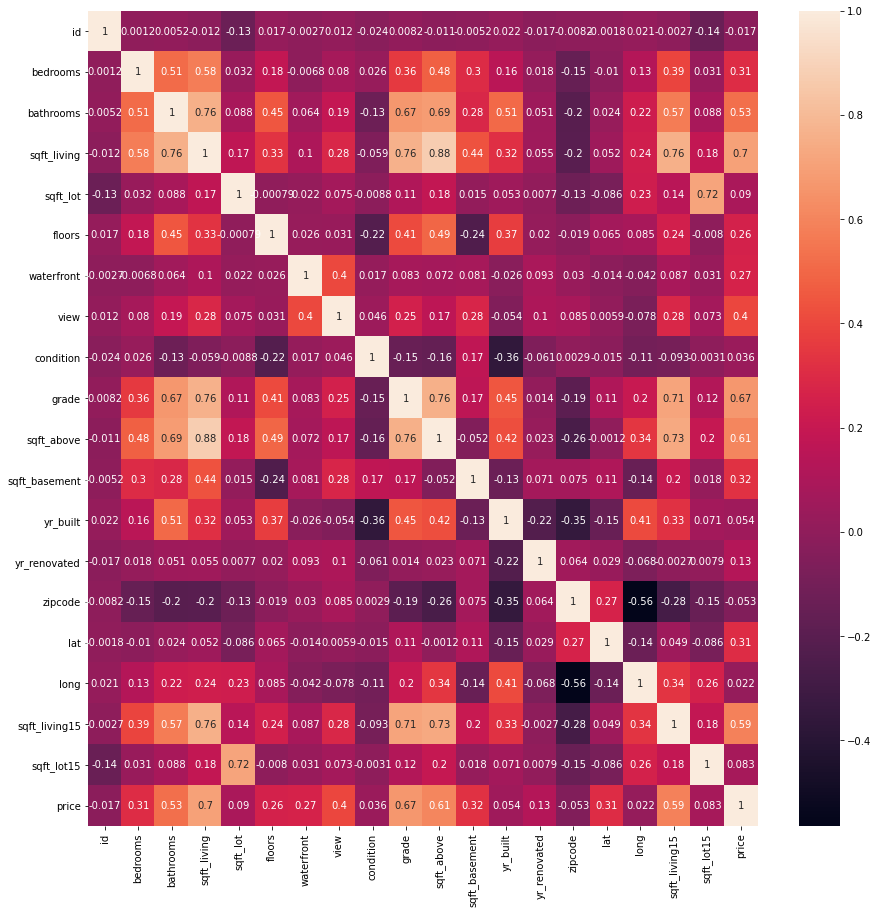

In [56]:
#checking correlation matrix for strenght of collinearity of the  data with all comlumns
#(using Pearson correlation)
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data.corr(), annot=True)

In [57]:
#From the previous visuals some columns were dientified as not useful for the prediction of 'price' in our model
#Dropping columns

data_model= data.copy()

data_model= data_model.drop(columns=['id','lat','long', 'zipcode'])

data_model


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650,221900
1,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639,538000
2,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062,180000
3,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000,604000
4,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,1530,1509,360000
21593,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,1830,7200,400000
21594,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,1020,2007,402101
21595,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,1410,1287,400000


<AxesSubplot:>

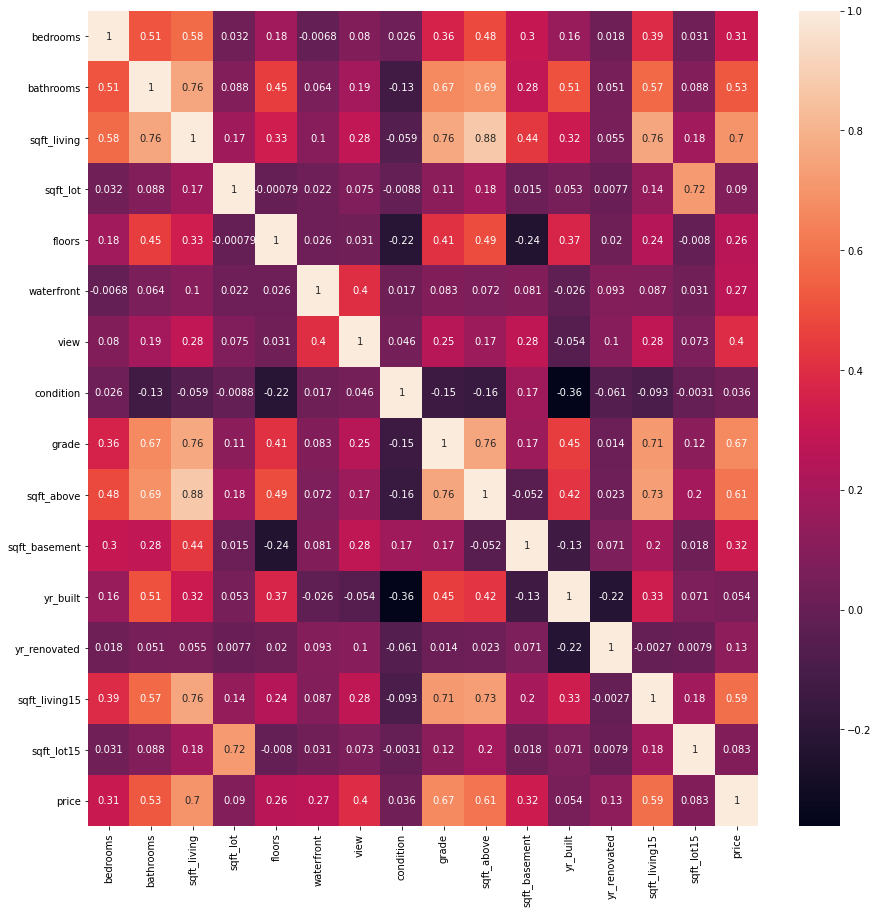

In [58]:
#Checking correlation matrix for dropped columns data
#(using Pearson correlation)
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data_model.corr(), annot=True)

By taking a look at the information above we might be able to draw some insights without running the model,some of the columns with values of measurements of the property seem to have a strong correlation as could be expected. On the other hand columns like 'lat' and 'long' shouldn't be evaluated against the 'price' for our model.

<AxesSubplot:xlabel='price'>

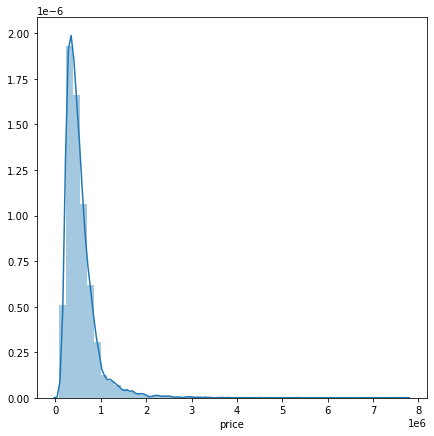

In [59]:
#Checking for distribution of the price column\
fig, ax = plt.subplots(figsize=(7,7))  
sns.distplot(data['price'])

In [60]:
data_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650,221900
1,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639,538000
2,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062,180000
3,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000,604000
4,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,1530,1509,360000
21593,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,1830,7200,400000
21594,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,1020,2007,402101
21595,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,1410,1287,400000


In [61]:
#Checking how many properties don't have a basement -vs- how many do
data.loc[data['sqft_basement']== 0]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
2,5631500400,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
4,1954400510,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
6,1321400060,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
7,2008000270,3,1.50,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [62]:
data.loc[data['sqft_basement']!= 0]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
1,6414100192,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
3,2487200875,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
5,7237550310,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
8,2414600126,3,1.00,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
10,1736800520,3,2.50,3560,9796,1,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,662500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21572,2767600688,2,1.50,1210,1278,2,0,0,3,8,1020,190,2007,0,98117,47.6756,-122.375,1210,1118,414500
21574,7430200100,4,3.50,4910,9444,2,0,0,3,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063,1220000
21579,1972201967,2,2.25,1530,981,3,0,0,3,8,1480,50,2006,0,98103,47.6533,-122.346,1530,1282,520000
21590,7936000429,4,3.50,3510,7200,2,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,1010000


In [63]:
#Checking how many properties have a waterfront
data.loc[data['waterfront']!= 0]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
49,822039084,3,2.50,2753,65005,1,1,2,5,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513,1350000
230,8096000060,2,1.75,1450,15798,2,1,4,3,7,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193,655000
246,2025069065,4,2.50,3650,8354,1,1,4,3,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841,2400000
264,2123039032,1,0.75,760,10079,1,1,4,5,5,760,0,1936,0,98070,47.4683,-122.438,1230,14267,369900
300,3225069065,4,5.00,4550,18641,1,1,4,3,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508,3080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2025069140,3,2.50,2830,4334,3,1,4,3,10,2830,0,2006,0,98074,47.6318,-122.071,2830,38211,1900000
20309,518500480,3,3.50,4410,10756,2,1,4,3,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634,3000000
20751,8043700105,4,4.00,4360,8175,3,1,4,3,10,3940,420,2007,0,98008,47.5724,-122.104,2670,8525,2300000
21185,518500460,3,3.50,3760,5634,2,1,4,3,11,2830,930,2014,0,98056,47.5285,-122.205,3560,5762,2230000


In [64]:
#Checking for variance in dataframe
data['price'].var()

134959350361.55782

In [65]:
data_model.var()

bedrooms         8.580296e-01
bathrooms        5.913368e-01
sqft_living      8.429189e+05
sqft_lot         1.715006e+09
floors           3.216698e-01
waterfront       7.490729e-03
view             5.873534e-01
condition        4.232096e-01
grade            1.376397e+00
sqft_above       6.851862e+05
sqft_basement    1.959548e+05
yr_built         8.629044e+02
yr_renovated     1.614605e+05
sqft_living15    4.695408e+05
sqft_lot15       7.438952e+08
price            1.349594e+11
dtype: float64

In [66]:
#Checking for standard deviation
data_model.std()

bedrooms              0.926299
bathrooms             0.768984
sqft_living         918.106125
sqft_lot          41412.636876
floors                0.567159
waterfront            0.086549
view                  0.766390
condition             0.650546
grade                 1.173200
sqft_above          827.759761
sqft_basement       442.667800
yr_built             29.375234
yr_renovated        401.821438
sqft_living15       685.230472
sqft_lot15        27274.441950
price            367368.140101
dtype: float64

In [67]:
#Some of the columns present very extreme deviations, but the values of the columns are scaled differently therefore
#there's a scale bias that's need to be solved in order to built the model

## Binning Data

In [68]:
#from the exploration of data, it was noted that columns: 'grade', 'condition', 'yr_built' need binning
#Checking columns
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [69]:
data['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [70]:
data['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [71]:
data['yr_built'].max()

2015

In [72]:
data['yr_built'].min()

1900

In [73]:
#Defining bins

#bins for 'condition' 0-2.5,2.5-5 Where column 'condition' is an index from 1 to 5 on the condition of the apartment

#bins for 'grade' we need 1-5, 5-10, 10-15 where 1-3 falls short of building construction and design, 7 has an average level of construction 
#and design, and 11-13 have a high quality level of construction and design.

#bins for 'yr_built' 1900-1950 (1-50), 1950-2000 (51-100), 2000-2050 (101-150)

#column 'grade'
bins = [0, 5, 10, 15]
group_names = ['low', 'average', 'high']


In [74]:
data_model['grade_bin'] = pd.cut(data['grade'], bins, labels=group_names)

In [75]:
data_model['grade_bin']

0        average
1        average
2        average
3        average
4        average
          ...   
21592    average
21593    average
21594    average
21595    average
21596    average
Name: grade_bin, Length: 21597, dtype: category
Categories (3, object): ['low' < 'average' < 'high']

In [76]:
data_model['grade_bin'].value_counts()

average    20826
high         501
low          270
Name: grade_bin, dtype: int64

In [77]:
#column 'condition'
bins2 = [1,2,3,5]
group_names2 = ['low', 'average', 'high']

In [78]:
data_model['condition_bin'] = pd.cut(data['condition'], bins2, labels=group_names2)

In [79]:
data_model['condition_bin'].value_counts()

average    14020
high        7378
low          170
Name: condition_bin, dtype: int64

In [80]:
data_model['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [81]:
#column 'yr_built'
bins3 = [1900,1950,2000,2050]
group_names3 = ['old', 'average', 'recent']

In [82]:
data_model['yr_built_bin'] = pd.cut(data['yr_built'], bins3, labels=group_names3)

In [83]:
data_model['yr_built_bin']

0        average
1        average
2            old
3        average
4        average
          ...   
21592     recent
21593     recent
21594     recent
21595     recent
21596     recent
Name: yr_built_bin, Length: 21597, dtype: category
Categories (3, object): ['old' < 'average' < 'recent']

In [84]:
data_model['yr_built_bin'].value_counts()

average    11875
old         5097
recent      4538
Name: yr_built_bin, dtype: int64

## Getting Dummies

In [85]:
yr_built_dum = pd.get_dummies(data_model['yr_built_bin'])

In [86]:
yr_built_dum

,old,average,recent
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
21592,0,0,1
21593,0,0,1
21594,0,0,1
21595,0,0,1


In [87]:
condition_dum = pd.get_dummies(data_model['condition_bin'])

In [88]:
condition_dum

,low,average,high
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
21592,0,1,0
21593,0,1,0
21594,0,1,0
21595,0,1,0


In [89]:
grade_dum = pd.get_dummies(data_model['grade_bin'])  

In [90]:
grade_dum

,low,average,high
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
21592,0,1,0
21593,0,1,0
21594,0,1,0
21595,0,1,0


In [92]:
#data_model['grade_dum'] = pd.get_dummies(data_model['grade_bin']) 

In [93]:
data_model['grade_bin'].unique()

['average', 'high', 'low']
Categories (3, object): ['low' < 'average' < 'high']

In [94]:
data_model['grade_bin']

0        average
1        average
2        average
3        average
4        average
          ...   
21592    average
21593    average
21594    average
21595    average
21596    average
Name: grade_bin, Length: 21597, dtype: category
Categories (3, object): ['low' < 'average' < 'high']

In [95]:
data_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,grade_bin,condition_bin,yr_built_bin
0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650,221900,average,average,average
1,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639,538000,average,average,average
2,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062,180000,average,average,old
3,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000,604000,average,high,average
4,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503,510000,average,average,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,1530,1509,360000,average,average,recent
21593,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,1830,7200,400000,average,average,recent
21594,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,1020,2007,402101,average,average,recent
21595,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,1410,1287,400000,average,average,recent


In [96]:
data_model['condition_bin']

0        average
1        average
2        average
3           high
4        average
          ...   
21592    average
21593    average
21594    average
21595    average
21596    average
Name: condition_bin, Length: 21597, dtype: category
Categories (3, object): ['low' < 'average' < 'high']

In [97]:
#data_model['condition_dum'] = pd.get_dummies(data_model['condition_bin'])


In [98]:
data_model= pd.get_dummies(data_model, columns= ['condition_bin', 'grade_bin', 'yr_built_bin'])

In [99]:
#pd.get_dummies(data_model['condition_bin'])

In [100]:
#data_model

In [101]:
#len(condition_dum)

In [102]:
#data_model['yr_built_dum'] = pd.get_dummies(data_model['yr_built_bin'])

In [103]:
#data_model.drop(['condition_bin', 'grade_bin', 'yr_built_bin'], axis=1)

In [107]:
#data_model.drop(['grade', 'condition','yr_built','id', 'long', 'lat'], axis= 1)

In [109]:
data_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,price,condition_bin_low,condition_bin_average,condition_bin_high,grade_bin_low,grade_bin_average,grade_bin_high,yr_built_bin_old,yr_built_bin_average,yr_built_bin_recent
0,3,1.00,1180,5650,1,0,0,3,7,1180,...,221900,0,1,0,0,1,0,0,1,0
1,3,2.25,2570,7242,2,0,0,3,7,2170,...,538000,0,1,0,0,1,0,0,1,0
2,2,1.00,770,10000,1,0,0,3,6,770,...,180000,0,1,0,0,1,0,1,0,0
3,4,3.00,1960,5000,1,0,0,5,7,1050,...,604000,0,0,1,0,1,0,0,1,0
4,3,2.00,1680,8080,1,0,0,3,8,1680,...,510000,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3,0,0,3,8,1530,...,360000,0,1,0,0,1,0,0,0,1
21593,4,2.50,2310,5813,2,0,0,3,8,2310,...,400000,0,1,0,0,1,0,0,0,1
21594,2,0.75,1020,1350,2,0,0,3,7,1020,...,402101,0,1,0,0,1,0,0,0,1
21595,3,2.50,1600,2388,2,0,0,3,8,1600,...,400000,0,1,0,0,1,0,0,0,1


## Linear Regression Model

In [110]:
#Dependent Variable
Y = data_model['price']
#Independent Variables
X = data_model.drop(['price'], axis=1)

In [111]:
Y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21592    360000
21593    400000
21594    402101
21595    400000
21596    325000
Name: price, Length: 21597, dtype: int64

In [112]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,sqft_lot15,condition_bin_low,condition_bin_average,condition_bin_high,grade_bin_low,grade_bin_average,grade_bin_high,yr_built_bin_old,yr_built_bin_average,yr_built_bin_recent
0,3,1.00,1180,5650,1,0,0,3,7,1180,...,5650,0,1,0,0,1,0,0,1,0
1,3,2.25,2570,7242,2,0,0,3,7,2170,...,7639,0,1,0,0,1,0,0,1,0
2,2,1.00,770,10000,1,0,0,3,6,770,...,8062,0,1,0,0,1,0,1,0,0
3,4,3.00,1960,5000,1,0,0,5,7,1050,...,5000,0,0,1,0,1,0,0,1,0
4,3,2.00,1680,8080,1,0,0,3,8,1680,...,7503,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3,0,0,3,8,1530,...,1509,0,1,0,0,1,0,0,0,1
21593,4,2.50,2310,5813,2,0,0,3,8,2310,...,7200,0,1,0,0,1,0,0,0,1
21594,2,0.75,1020,1350,2,0,0,3,7,1020,...,2007,0,1,0,0,1,0,0,0,1
21595,3,2.50,1600,2388,2,0,0,3,8,1600,...,1287,0,1,0,0,1,0,0,0,1


### Splitting Train/Test

In [113]:
#Splitting 40% data  as testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4)

In [114]:
#Checking split

for data in (X_train, X_test, Y_train, Y_test):
    print(len(data))

12958
8639
12958
8639


### Without Normalizing

In [115]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

0.6715839085011694

In [ ]:
#R^2 of the prediction  

In [116]:
predictions  = lm.predict(X)
r2_score(Y, predictions)

0.6715839085011694

In [117]:
lm.intercept_

6118966.087865627

In [118]:
lm.coef_

array([-2.78407057e+04,  4.27722541e+04,  9.70174841e+01, -1.19350573e-02,
        9.91650853e+03,  5.65247862e+05,  4.14125609e+04,  3.39871683e+04,
        1.14645304e+05,  3.98078311e+01,  5.72096532e+01, -3.46770235e+03,
        1.80309655e+01,  2.76998317e+01, -4.58697647e-01, -1.22073152e+04,
       -3.31683841e+04, -4.18102601e+04, -3.36938522e+04, -1.31214740e+05,
        1.64908592e+05,  6.20452044e+04,  3.24100601e+04,  1.08626776e+05])

### Normalizing Data

In [133]:
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

### With Normalized Data

In [134]:
lm = LinearRegression()
model = lm.fit(x,Y)
lm.score(x,Y)

0.4760634107975331

In [136]:
predictions  = lm.predict(x)
r2_score(Y, predictions)

0.4760634107975331

In [137]:
lm.intercept_

1029993.8896142219

In [138]:
lm.coef_

array([-3.66043882e+08,  1.00187302e+08,  9.68766635e+05, -2.94952252e+05,
        3.21545596e+08,  1.01302083e+10,  4.68030173e+08,  3.32248748e+08,
        9.83839010e+08,  2.19731244e+05,  7.49035396e+05, -1.68284850e+07,
        6.13979623e+04,  2.49497720e+05, -3.76678492e+05,  4.55316984e+08,
        4.81512586e+08,  2.54946696e+08,  2.18684683e+10,  2.12071381e+10,
        3.22345242e+10,  1.00448573e+08, -5.92861181e+08, -1.42763179e+08])

### Machine Learning Model

#### Splitting normalized data

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,Y, test_size=0.4)

In [125]:
#Checking split

for data in (x_train, x_test, y_train, y_test):
    print(len(data))

12958
8639
12958
8639


In [126]:
#apply the machine learn model with normalized 
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)


0.4560691494926651

In [127]:
#apply the machine learn model without normalized data
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)


-0.6677962091430718

### Tableau Requirements

Please find the required tasks on Tableau Public: 

    Some points to keep in mind while working on the tableau questions:
    a) The plots should be well labelled briefly describing the purpose of the plot
    b) Select the chart type that produces an effective outcome for a given scenario
    c) Focus audience attention on the most important data
    d) Use space, color and fonts appropriately
    e) Use correct title for the plots.
    f) Utilize formatted tooltips and descriptive titles
    g) Format the axes wherever necessary
    h) Use caption to add details wherever necessary
    i) Use appropriate level of details with labels and color coding etc.
    j) For the dashboard make sure that the information represented is clear and easy to understand. The user of the dashboard should be able to understand the purpose of the dashboard and should be able to make decisions looking at the plots presented.
    k) You can also use filters wherever appropriate to give the user the flexibility to view different information easily


<b> 1. Convert the necessary measures to dimensions (the variables that are categorical in nature)

![alt text](Image9.png "Screenshot")

<b> 2. Plot the distribution of price vs. number of bedrooms, price vs. number of bathrooms, price vs. condition, price vs. floors, price vs. grade, price vs. view, and price vs. waterfront. State your observation for each one of those graphs. Do you see any trends in prices vs the rest of those variables individually? This can also be used for EDA to identify some data cleaning operations that you might need to perform further.

For the plotting of Bathrooms and Bedrooms against price, there's seems to be a trend in

    -Bathrooms and Bedrooms alternate quite consistently in price, but as more bedrooms the property has, the price tends to go higher more drastically than on bathrooms.
    
For the rest:

    - As drawn from the EDA, there's indeed and outlier in the Bedroom column that needs to be removed.
    - As the 'Waterfront' column is a Boolean, no real insights were obtained that weren't previously known by the EDA such as the fact that most properties don't have a waterfront view.
    -Condition, Grade, View have in common that the higher the condition or grade, or having a good view or a viewfront, all tend to raise the value (price) of the property.

<b> 3. Draw scatter plots for price vs. sqft_above, price vs. sqft_basement, price vs. living15, price vs. sqft_lot15.

![alt text](Image10.png "Screenshot")

<b> 4. Identify using tableau which state data is presented to you. Use latitude (generated), longitude (generated), and zip code for this. Color code the zip codes based on the prices to see which areas are more expensive than the others.

![alt text](Image11.png "Screenshot")

<b> 5. Create a plot to check which are the more selling properties based on the number of bedrooms in the house. Create a plot of bedrooms vs. count of data points.

![alt text](Image12.png "Screenshot")

<b> 6. We want to see the trend in price of houses based on the year built. From our previous plot, we know that most of our customers are interested in three and four bedroom houses. Create a filter on bedroom feature to select those properties and compare the trends in prices using line charts.

![alt text](Image13.png "Screenshot")

<b> 7. Create calculated field year_built_bins for the column year_built by creating buckets as follows, for houses built between 1900 and 2000 - category A, for houses built between 2000 and 2010 - category B, and for houses built between 1900 and 2000 - category C. Use IF-ELSE statement to create the bins/buckets. Compare the prices of houses for the three categories.

<b> 8. Now we want to deep dive into the categories we created in the last question. Let’s see how many properties are in each of the categories. Indicate the numbers as labels on each of the three categories.

<b> 9. Deep dive in category A, category B and category C using filters. Identify different characteristics/trends for each of the three categories.

<b> 10. Create a visually appealing dashboard to represent the information.